In [ ]:
'''
SVD :Singular-Value Decomposition
    - Mathematically we can say that factorization of any matrix(m×n) into its eigendecomposition or unitary matrix U(m×m), 
      rectangular diagonal matrix 𝚺(m×n) and V*(n×n) complex unitary matrix is called singular-value decomposition.

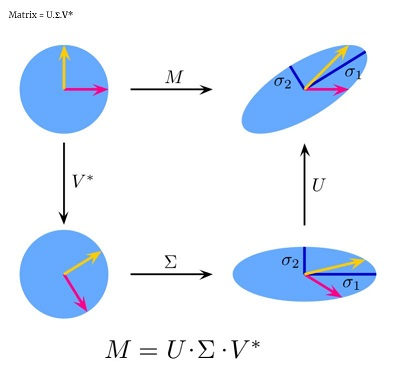

In [ ]:
'''
SVD is a popular method for dimensionality reduction. However, it works better with sparse data. 
Here sparse data refers to the data with many zero values.

In [ ]:
'''
The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent 
parts in order to make certain subsequent matrix calculations simpler.

In [ ]:
'''
Different Types of SVDs
    - Truncated SVD
    - Partial least square SVD
    - Randomized SVD

In [ ]:
'''
SVD: Singular-Value Decomposition
    - SVD is the decomposition of a matrix A into 3 matrices – U, S, and V
        - U, s, VT = SVD()
        - Two unitary matrices (U, s) 
        - Rectangular diagonal matrix of singular values (Σ) or VT
    - To understand the concept of Singular Value Decomposition the knowledge on eigenvalues and eigenvectors is essential. 

In [ ]:
'''
s : The singular values are the square root of positive eigenvalues

In [ ]:
'''
How to Compute SVD Manully

    A = Original Matrix
    AT = Transpose of A

    Computer Matrix Multiplication of A and AT called AAT

    Computer Matrix Multiplication of AT and A called ATA

    Computer Eigen values and Vector for AAT and ATA

    Eigen Vector from AAT is called U
    Eigen Vector from ATA is called V

    Square Root of positive eigenvalues is called S (Singular Values)

    To reconstruct original matrix use below the formula

    A = U s VT

        U : Eigen vector from AAT
        s = Square Root of positive eigenvalues
        VT = Tranpose of Eigen vector from ATA


In [ ]:
'''
Difference Between SVD and Truncated SVD

- When it comes to matrix factorization technique, truncated Singular Value Decomposition (SVD) is a popular method to produce 
  features that factors a matrix M into the three matrices U, Σ, and V. 

- Truncated SVD produces a factorization where the number of columns can be specified for a number of truncation.

- Given an n x n matrix, truncated SVD generates the matrices with the specified number of columns, whereas SVD outputs n 
  columns of matrices.

In [ ]:
'''
The advantages of truncated SVD over PCA
    - Truncated SVD can deal with sparse matrix to generate features’ matrices, whereas PCA would operate on the entire matrix 
      for the output of the covariance matrix.

### Example 01

[0.52875361 0.44845576]


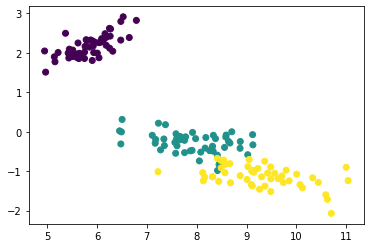

In [6]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

iris = load_iris()
iris_X = iris.data
y = iris.target

svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_X)

print(svd.explained_variance_ratio_)

plt.scatter(iris_transformed[:,0],iris_transformed[:,1],c =y)

### Reconstruct Matrix from SVD 

In [8]:
        # Reconstruct SVD
        from numpy import array
        from numpy import diag
        from numpy import dot
        from numpy import zeros
        from scipy.linalg import svd
        # define a matrix
        A = array([[1, 2], [3, 4], [5, 6]])
        print(A)

        # Singular-value decomposition
        U, s, VT = svd(A)

        # create m x n Sigma matrix
        Sigma = zeros((A.shape[0], A.shape[1]))

        # populate Sigma with n x n diagonal matrix
        Sigma[:A.shape[1], :A.shape[1]] = diag(s)

        # reconstruct matrix
        B = U.dot(Sigma.dot(VT))
        print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


### SVD Using Numpy

In [9]:
import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


### SVD Using SKLearn

In [10]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.78885438e+00 -1.34164079e+00]
 [-8.94427191e-01  2.68328157e+00]
 [ 2.23606798e+00  1.78194819e-16]]


### Randomized SVD

In [ ]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

### SVD for Pseudoinverse

In [11]:
# Pseudoinverse
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
    [0.1, 0.2],
    [0.3, 0.4],
    [0.5, 0.6],
    [0.7, 0.8]])

print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.28757642e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


In [7]:
import numpy as np
#check how to use TRuncatedSVD
X=[[1,2,3],[1,4,2],[4,1,7],[5,6,8]]

# TRUNCATED SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)

U=svd.fit_transform(X)

V=svd.components_
S=svd.singular_values_ 
print('u,s,v', US,S,V)
print('X_restored dot way',np.round(np.dot(U,V),1),'svdinverse way',np.round(svd.inverse_transform(U),1))

# LINALG SVD

U1,S1,V1=np.linalg.svd(X)

print('u1,s1,v1 remark negative mirrored',U1[:,:2]*S1[:2],V1[:2,:])
print('X restored u1,s1,v1, 2 components',np.round( np.dot( U1[:,:2]*S1[:2],V1[:2,:] ),1 ) ) 

# sparse svd
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs
A = csc_matrix(X, dtype=float)

u2, s2, vt2 = svds(A, k=2)

print('sparse reverses !',u2*s2,vt2)
print('x restored',np.round( np.dot(u2*s2,vt2),1) )

u,s,v [[ 3.66997034 -0.34754761]
 [ 3.82764223 -2.51681397]
 [ 7.61154768  2.83860088]
 [11.13470337 -0.96070751]] [14.49264657  3.92883644] [[ 0.44571865  0.46215842  0.76664495]
 [ 0.23882889 -0.88677195  0.39572247]]
X_restored dot way [[1.6 2.  2.7]
 [1.1 4.  1.9]
 [4.1 1.  7. ]
 [4.7 6.  8.2]] svdinverse way [[1.6 2.  2.7]
 [1.1 4.  1.9]
 [4.1 1.  7. ]
 [4.7 6.  8.2]]
u1,s1,v1 remark negative mirrored [[ -3.66997034  -0.34754761]
 [ -3.82764223  -2.51681397]
 [ -7.61154768   2.83860088]
 [-11.13470337  -0.96070751]] [[-0.44571865 -0.46215842 -0.76664495]
 [ 0.23882889 -0.88677195  0.39572247]]
X restored u1,s1,v1, 2 components [[1.6 2.  2.7]
 [1.1 4.  1.9]
 [4.1 1.  7. ]
 [4.7 6.  8.2]]
sparse reverses ! [[-0.34754761  3.66997034]
 [-2.51681397  3.82764223]
 [ 2.83860088  7.61154768]
 [-0.96070751 11.13470337]] [[ 0.23882889 -0.88677195  0.39572247]
 [ 0.44571865  0.46215842  0.76664495]]
x restored [[1.6 2.  2.7]
 [1.1 4.  1.9]
 [4.1 1.  7. ]
 [4.7 6.  8.2]]
